In [1]:
## Standard libraries
from PIL import Image
import numpy as np
import cv2

## Imports for plotting
import matplotlib.pyplot as plt

## PyTorch
import torch

## Torchvision
from torchvision import transforms

## EuroSAT and ViT
import sys
sys.path.append('../architectures/ViT')
from architectures.ViT.predict import get_pretrained_model_EuroSAT, get_transform_EuroSAT, get_vit_EuroSAT


/Users/m.hidalgo/.local/share/virtualenvs/vit-hij5KBdv/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Test Image
# img_url = "../data/2750/Highway/Highway_79.jpg"
# img_url = "../data/2750/Highway/Highway_1.jpg"
# img_url = "../data/2750/Industrial/Industrial_1.jpg"
# img_url = "../data/2750/River/River_77.jpg"
img_url = "../data/2750/River/River_1.jpg"
# img_url = "../data/2750/River/River_5.jpg"
# img_url = "../data/2750/River/River_7.jpg"
# img_url = "../data/2750/River/River_8.jpg"
# img_url = "../data/Highway_2.jpg"

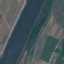

In [3]:
im = Image.open(img_url)
im

In [4]:
import os
os.getcwd()

'/Users/m.hidalgo/Documents/Uni/vit/notebooks'

In [5]:
IMAGE_SIZE=64
PATCH_SIZE=4
MODEL_DIR=f"../weights/ViT/image_{IMAGE_SIZE}/patch_{PATCH_SIZE}/best.pt"

In [6]:
model_saved = get_pretrained_model_EuroSAT(best_weights_file=MODEL_DIR)
model = get_vit_EuroSAT(image_size=IMAGE_SIZE, patch_size=PATCH_SIZE)
model.load_state_dict(model_saved['model_state'])
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
model.eval()

tr = get_transform_EuroSAT(image_size=IMAGE_SIZE)
normalization = model_saved['normalization']
tr.transforms.append(transforms.Normalize(**normalization))

x = tr(im)
x.size()

ViT bias numel 10


torch.Size([3, 64, 64])

In [7]:
# model

In [8]:
x

tensor([[[ 0.4497,  0.4497,  0.2556,  ..., -0.2492, -0.1521, -0.1327],
         [ 0.4497,  0.4497,  0.2362,  ..., -0.2492, -0.1715, -0.1521],
         [ 0.3721,  0.3915,  0.1973,  ..., -0.2686, -0.2104, -0.2104],
         ...,
         [-0.8122, -0.8122, -0.7928,  ..., -0.6181, -0.5987, -0.5793],
         [-0.8317, -0.8317, -0.8122,  ..., -0.6181, -0.5793, -0.5016],
         [-0.8511, -0.8511, -0.8317,  ..., -0.6375, -0.5598, -0.4434]],

        [[ 0.5227,  0.5227,  0.1164,  ..., -0.3189, -0.2319, -0.2028],
         [ 0.5227,  0.5227,  0.1454,  ..., -0.3189, -0.2609, -0.2319],
         [ 0.4647,  0.4357,  0.0874,  ..., -0.2609, -0.2609, -0.2609],
         ...,
         [-0.8413, -0.8413, -0.8994,  ..., -0.4350, -0.4640, -0.4350],
         [-0.8704, -0.8704, -0.9284,  ..., -0.4350, -0.4350, -0.4060],
         [-0.8994, -0.8994, -0.9574,  ..., -0.4640, -0.4060, -0.3189]],

        [[ 0.3448,  0.3448, -0.1048,  ..., -0.5544, -0.3469, -0.3123],
         [ 0.3448,  0.3448, -0.1048,  ..., -0

In [9]:
x.unsqueeze(0)

tensor([[[[ 0.4497,  0.4497,  0.2556,  ..., -0.2492, -0.1521, -0.1327],
          [ 0.4497,  0.4497,  0.2362,  ..., -0.2492, -0.1715, -0.1521],
          [ 0.3721,  0.3915,  0.1973,  ..., -0.2686, -0.2104, -0.2104],
          ...,
          [-0.8122, -0.8122, -0.7928,  ..., -0.6181, -0.5987, -0.5793],
          [-0.8317, -0.8317, -0.8122,  ..., -0.6181, -0.5793, -0.5016],
          [-0.8511, -0.8511, -0.8317,  ..., -0.6375, -0.5598, -0.4434]],

         [[ 0.5227,  0.5227,  0.1164,  ..., -0.3189, -0.2319, -0.2028],
          [ 0.5227,  0.5227,  0.1454,  ..., -0.3189, -0.2609, -0.2319],
          [ 0.4647,  0.4357,  0.0874,  ..., -0.2609, -0.2609, -0.2609],
          ...,
          [-0.8413, -0.8413, -0.8994,  ..., -0.4350, -0.4640, -0.4350],
          [-0.8704, -0.8704, -0.9284,  ..., -0.4350, -0.4350, -0.4060],
          [-0.8994, -0.8994, -0.9574,  ..., -0.4640, -0.4060, -0.3189]],

         [[ 0.3448,  0.3448, -0.1048,  ..., -0.5544, -0.3469, -0.3123],
          [ 0.3448,  0.3448, -

In [10]:
x.unsqueeze(0).size()  # [1, C:channels = 3, image_size = 32, , image_size = 32]

torch.Size([1, 3, 64, 64])

In [11]:
logits, att_mat = model(x.unsqueeze(0))
len(att_mat)

6

In [12]:
attention_weights = torch.stack(att_mat).squeeze(1)
attention_weights.shape

torch.Size([6, 8, 257, 257])

In [13]:
# Average the attention weights across all heads.
attention_weights_head_mean = torch.mean(attention_weights, dim=1)
attention_weights_head_mean.shape

torch.Size([6, 257, 257])

In [14]:
# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_att = torch.eye(attention_weights_head_mean.size(1))
residual_att.shape

torch.Size([257, 257])

In [15]:
aug_att_mat = attention_weights_head_mean + residual_att
aug_att_mat = aug_att_mat / aug_att_mat.sum(dim=-1).unsqueeze(-1)
aug_att_mat.shape

torch.Size([6, 257, 257])

In [16]:
# Recursively multiply the weight matrices
joint_attentions = torch.zeros(aug_att_mat.size())
joint_attentions[0] = aug_att_mat[0]
joint_attentions.shape

torch.Size([6, 257, 257])

In [17]:
for n in range(1, aug_att_mat.size(0)):
    joint_attentions[n] = torch.matmul(aug_att_mat[n], joint_attentions[n-1])
joint_attentions.shape

torch.Size([6, 257, 257])

In [18]:
v = joint_attentions[-1]
v.shape

torch.Size([257, 257])

In [19]:
grid_size = int(np.sqrt(aug_att_mat.size(-1)))
grid_size

16

In [20]:
mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
result = (mask * im).astype("uint8")
result.shape

(64, 64, 3)

Prediction Label and Attention Map!

0.99837 : River
0.00097 : Highway
0.00041 : Permanent Crop
0.00015 : Annual Crop
0.00006 : Industrial


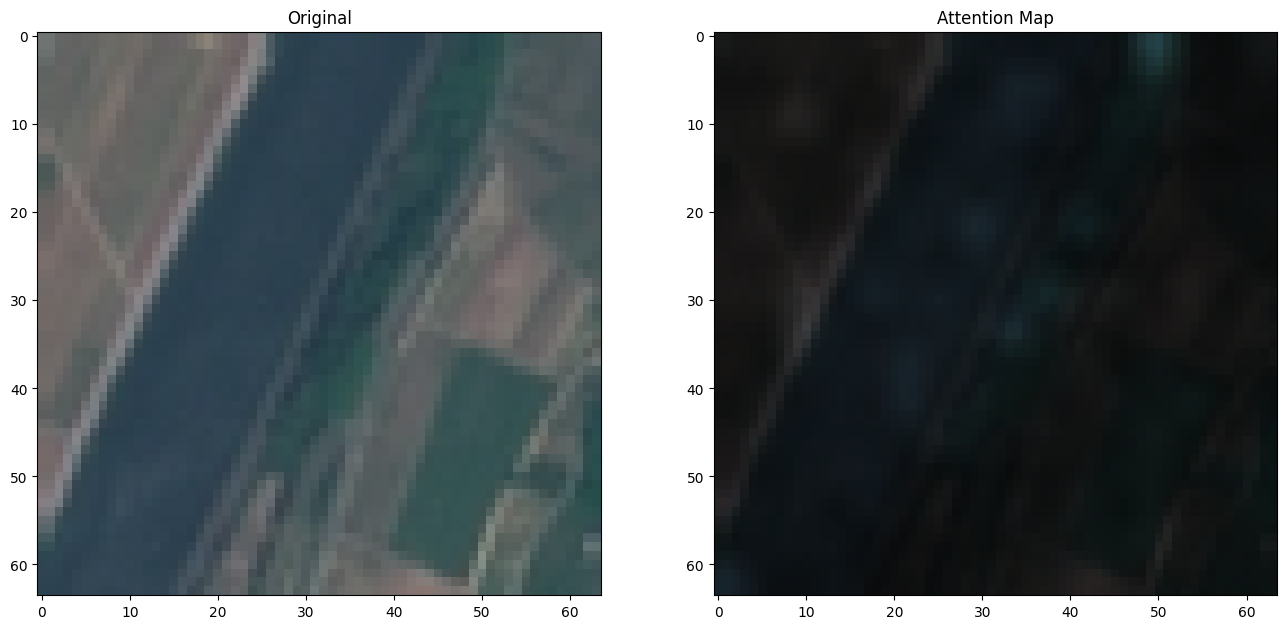

In [21]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(im)
_ = ax2.imshow(result)

probs = torch.nn.Softmax(dim=-1)(logits)
top5 = torch.argsort(probs, dim=-1, descending=True)
print("Prediction Label and Attention Map!\n")
EuroSAT_labels = dict(enumerate(open('../data/EuroSATLabels.txt')))
for idx in top5[0, :5]:
    print(f'{probs[0, idx.item()]:.5f} : {EuroSAT_labels[idx.item()]}', end='')

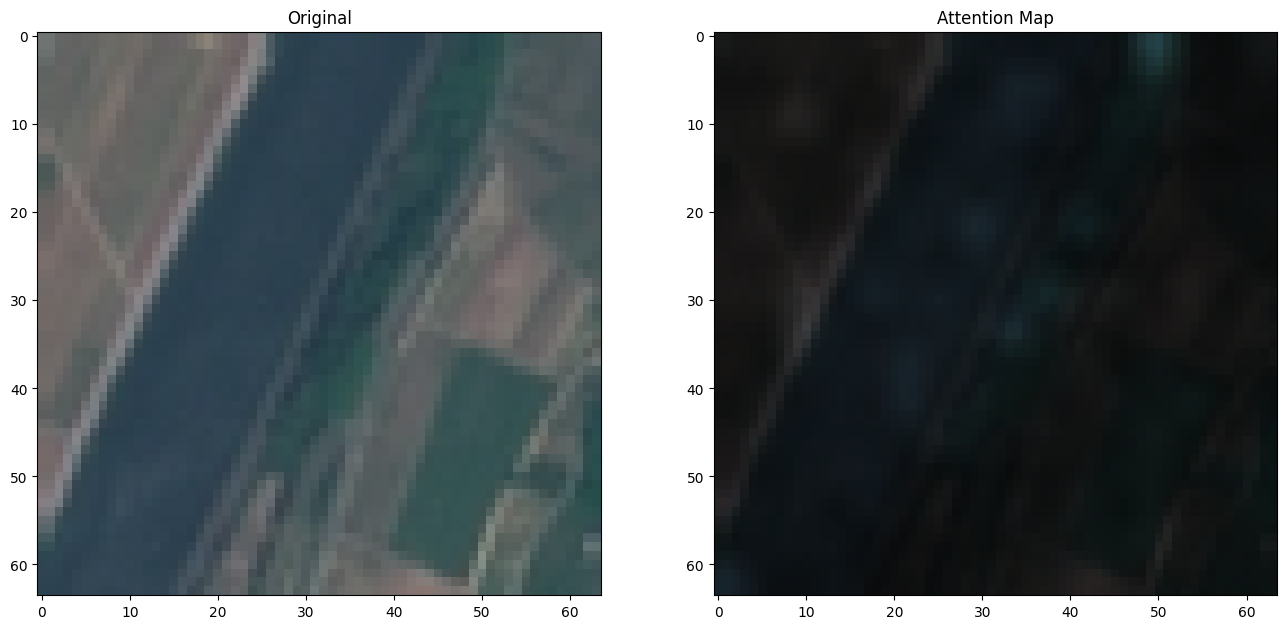

In [22]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))

ax1.set_title('Original')
ax2.set_title('Attention Map')
_ = ax1.imshow(im)
_ = ax2.imshow(result)

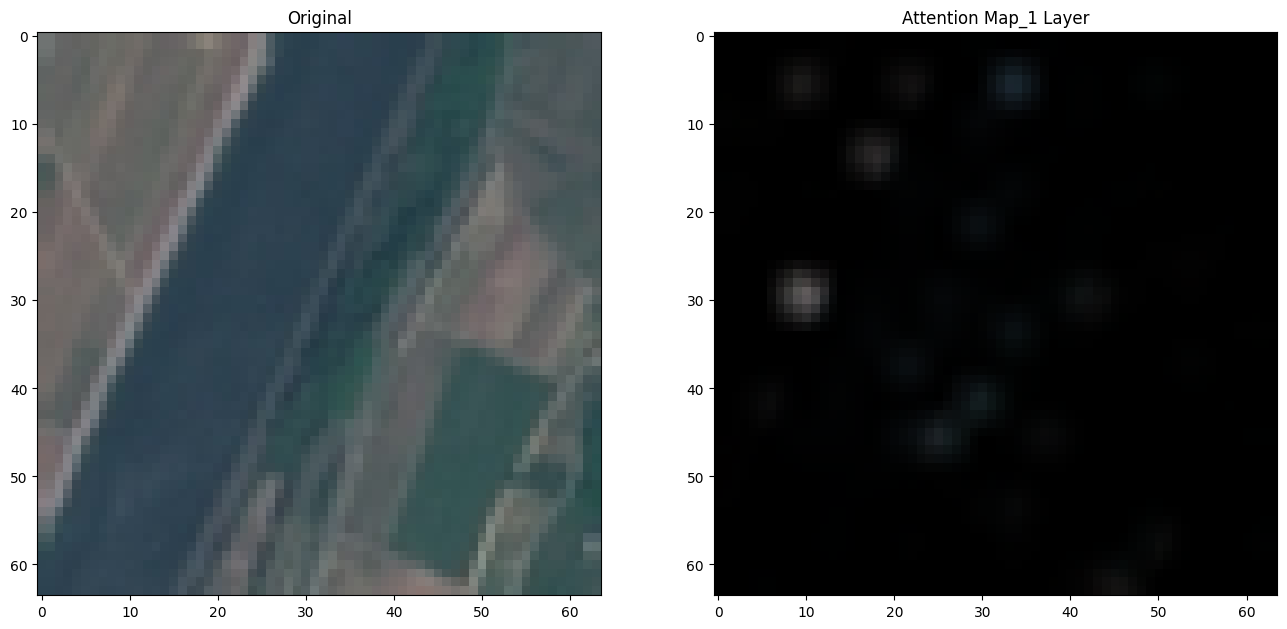

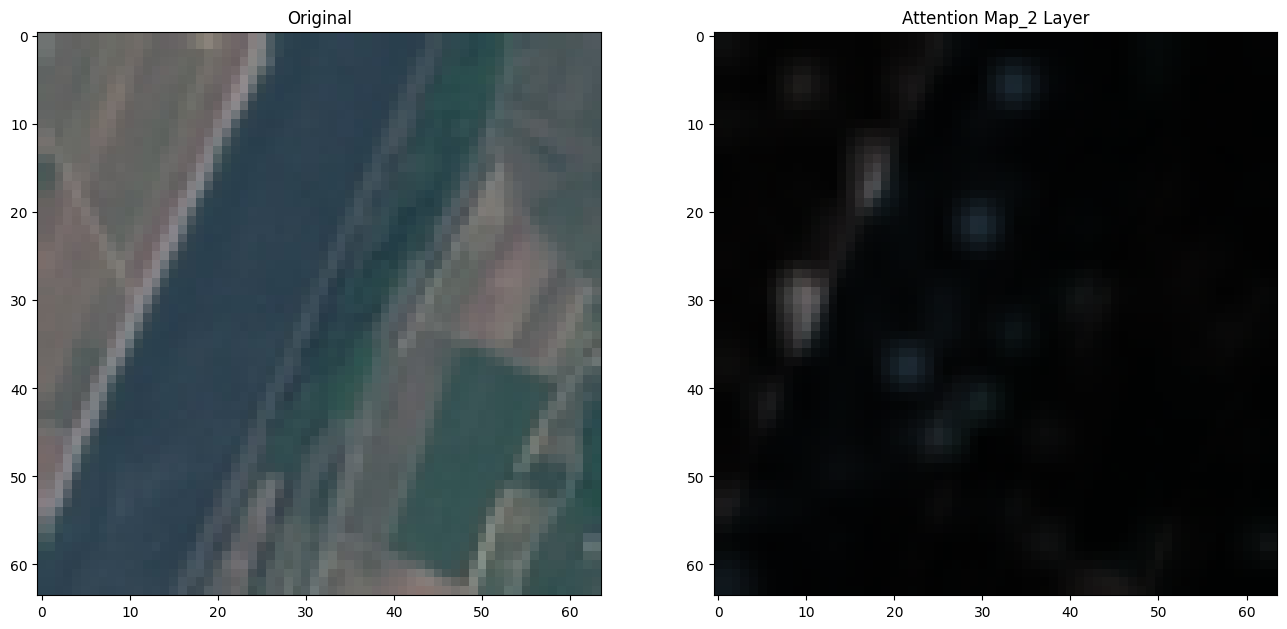

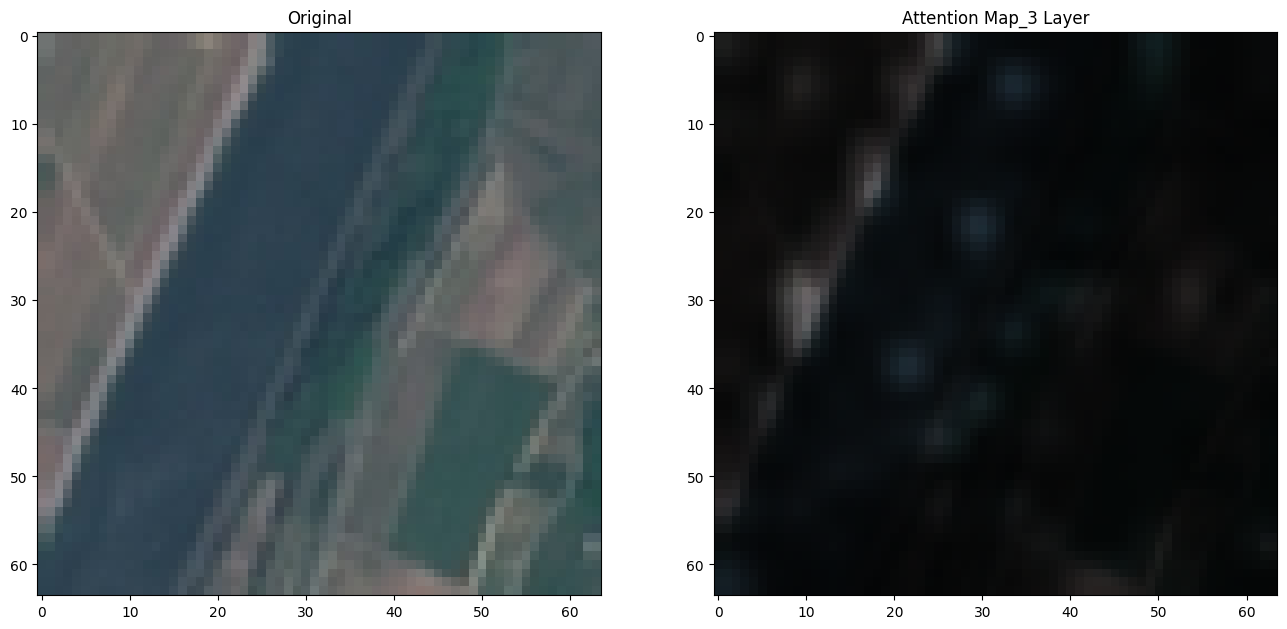

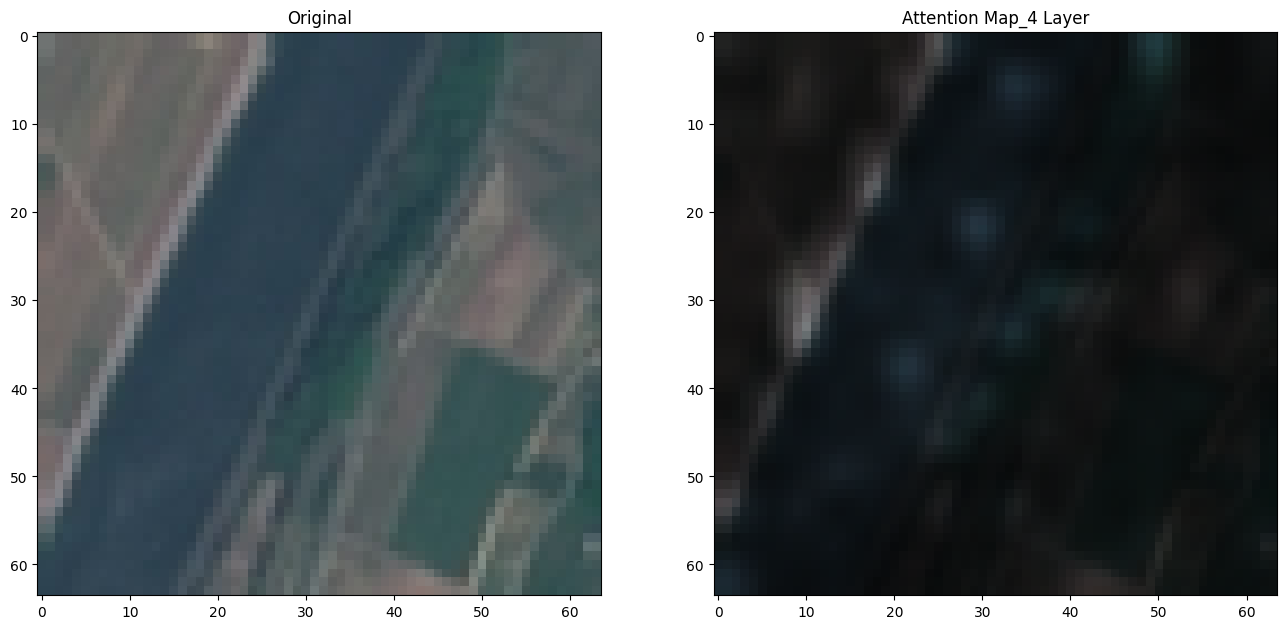

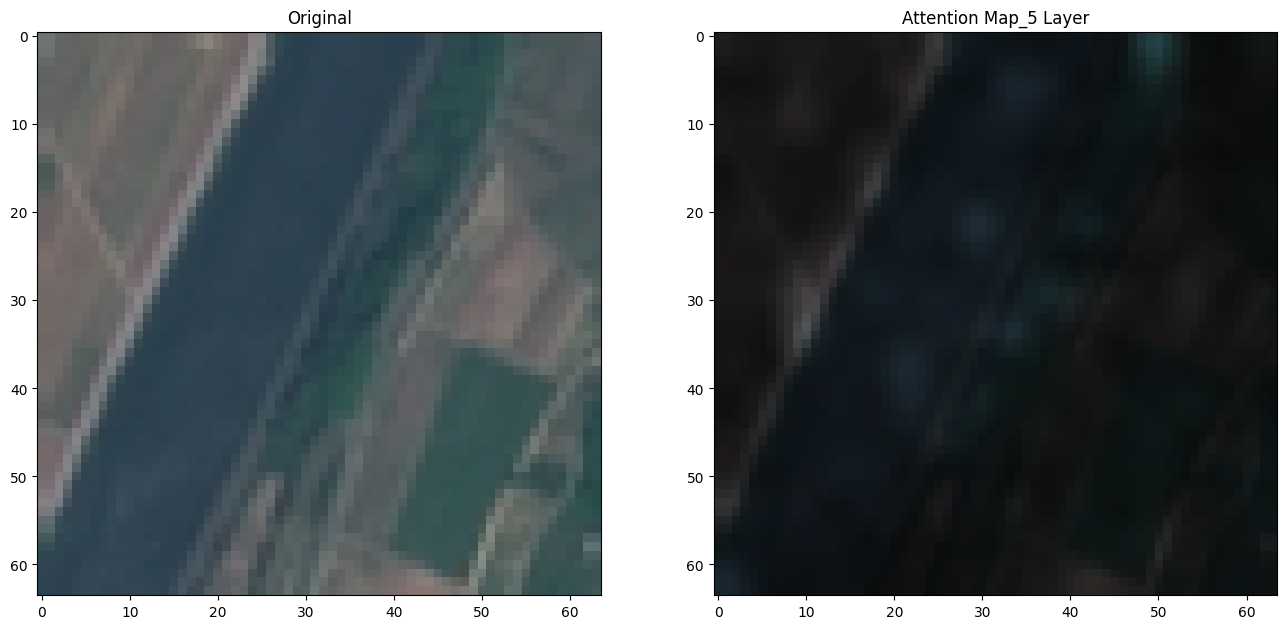

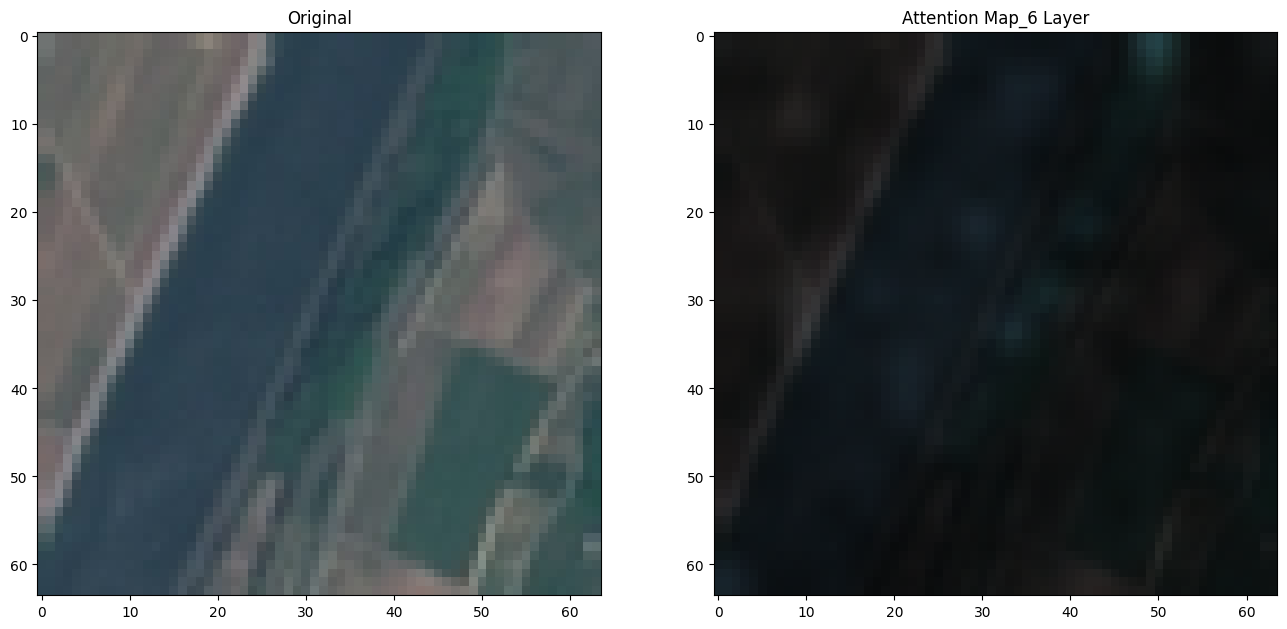

In [23]:
for i, v in enumerate(joint_attentions):
    # Attention from the output token to the input space.
    mask = v[0, 1:].reshape(grid_size, grid_size).detach().numpy()
    mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
    result = (mask * im).astype("uint8")

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 16))
    ax1.set_title('Original')
    ax2.set_title('Attention Map_%d Layer' % (i+1))
    _ = ax1.imshow(im)
    _ = ax2.imshow(result)


Method II: Attention Rollout
https://keras.io/examples/vision/probing_vits/

In [24]:
_, attention_score_dict = model(x.unsqueeze(0))
len(attention_score_dict)

6

In [25]:
# # Stack the individual attention matrices from individual Transformer blocks.
# attn_mat = tf.stack([attention_score_dict[k] for k in attention_score_dict.keys()])
# attn_mat = tf.squeeze(attn_mat, axis=1)
attention_weights = torch.stack(attention_score_dict).squeeze(1)
attention_weights.shape

torch.Size([6, 8, 257, 257])

In [26]:
# Average the attention weights across all heads.
attention_weights_head_mean = torch.mean(attention_weights,  dim=1)
attention_weights_head_mean.shape

torch.Size([6, 257, 257])

In [27]:
# To account for residual connections, we add an identity matrix to the
# attention matrix and re-normalize the weights.
residual_attn = torch.eye(attention_weights_head_mean.shape[1])
aug_attn_mat = attention_weights_head_mean + residual_attn
aug_attn_mat = aug_attn_mat / torch.sum(aug_attn_mat, axis=-1)[..., None]
aug_attn_mat = aug_attn_mat.detach().numpy()
aug_attn_mat.shape

(6, 257, 257)

In [28]:
# Recursively multiply the weight matrices.
joint_attentions = np.zeros(aug_attn_mat.shape)
joint_attentions[0] = aug_attn_mat[0]
joint_attentions.shape

(6, 257, 257)

In [29]:
for n in range(1, aug_attn_mat.shape[0]):
    joint_attentions[n] = np.matmul(aug_attn_mat[n], joint_attentions[n - 1])
joint_attentions.shape

(6, 257, 257)

In [30]:
# Attention from the output token to the input space.
v = joint_attentions[-1]
v.shape

(257, 257)

In [31]:
grid_size = int(np.sqrt(aug_attn_mat.shape[-1]))
grid_size

16

In [32]:
mask = v[0, 1:].reshape(grid_size, grid_size)
mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
attn_rollout_result = (mask * im).astype("uint8")
attn_rollout_result.shape

(64, 64, 3)

/var/folders/_9/wqvvrmhs6434tn8ml5rgz8q9dh1tst/T/ipykernel_51583/3633828725.py:13: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


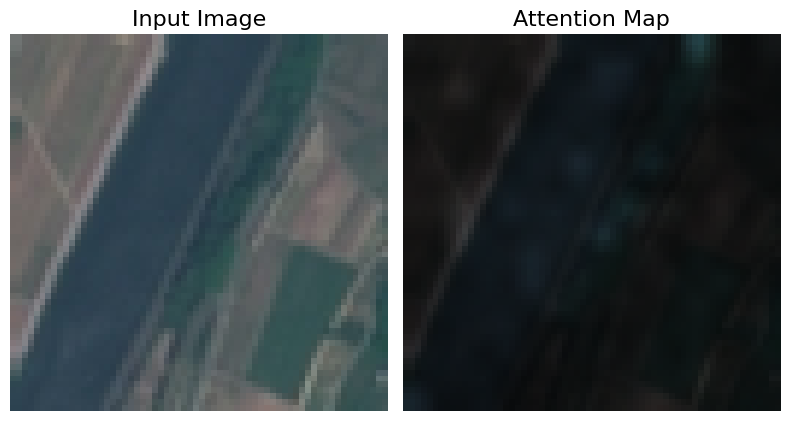

In [33]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 10))
# fig.suptitle(f"Predicted label: {predicted_label}.", fontsize=20)

_ = ax1.imshow(im)
_ = ax2.imshow(attn_rollout_result)
ax1.set_title("Input Image", fontsize=16)
ax2.set_title("Attention Map", fontsize=16)
ax1.axis("off")
ax2.axis("off")

fig.tight_layout()
fig.subplots_adjust(top=1.35)
fig.show()

Weights by layer

In [34]:
joint_attentions.shape

(6, 257, 257)

/var/folders/_9/wqvvrmhs6434tn8ml5rgz8q9dh1tst/T/ipykernel_51583/241477678.py:18: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


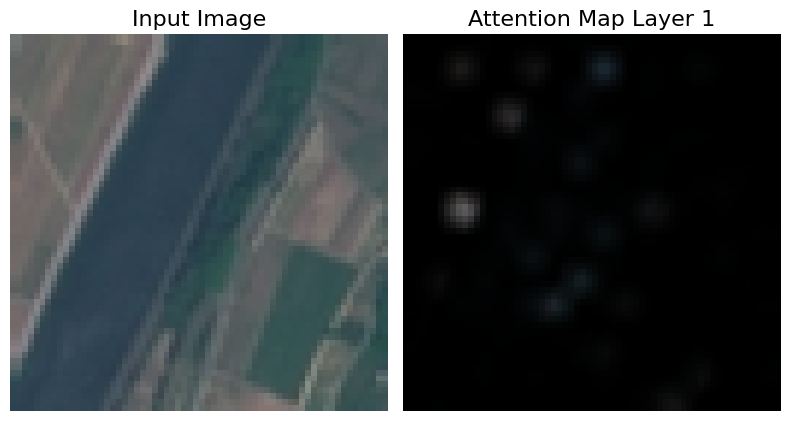

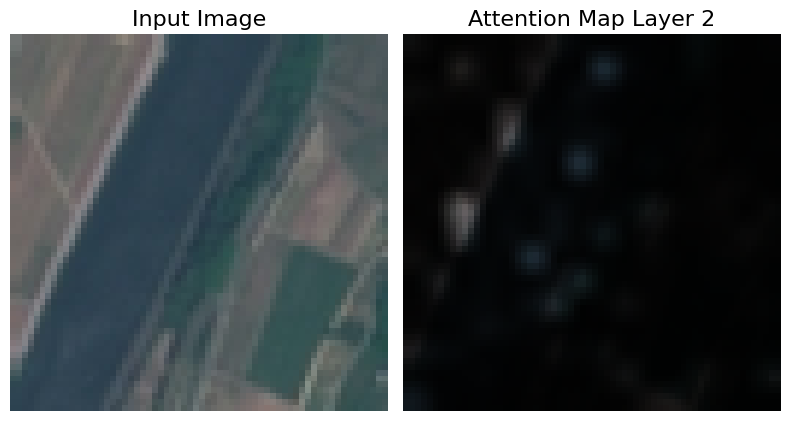

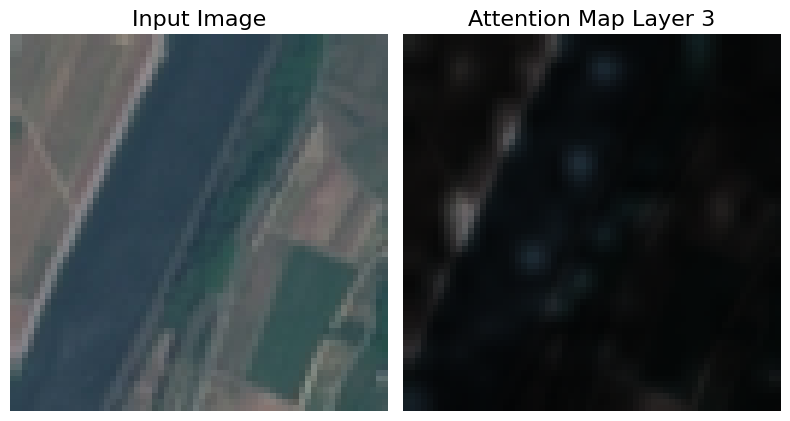

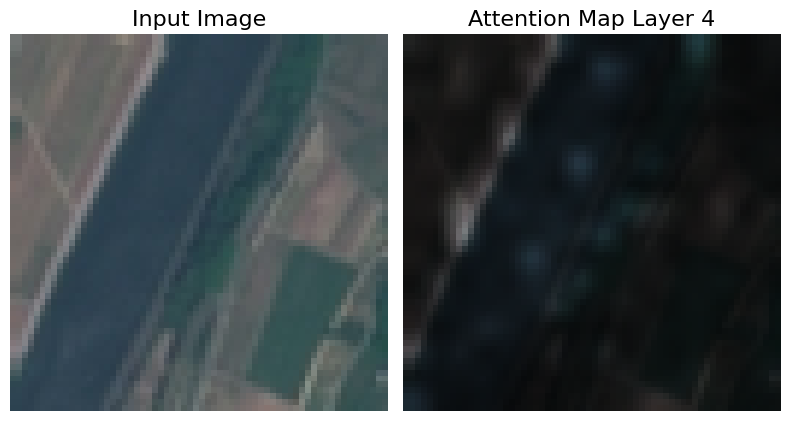

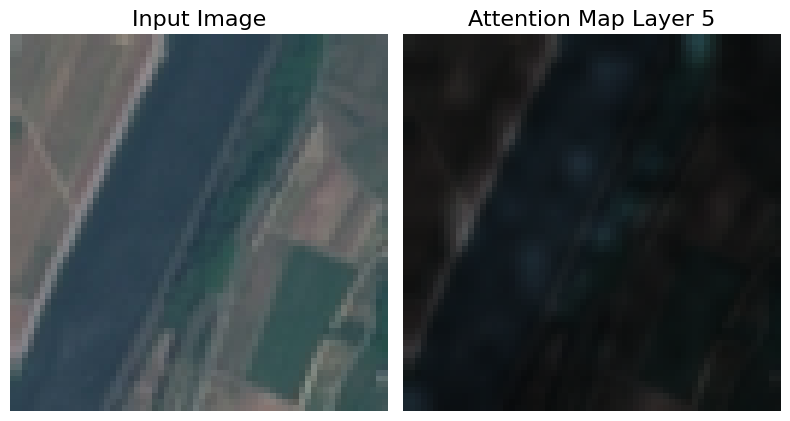

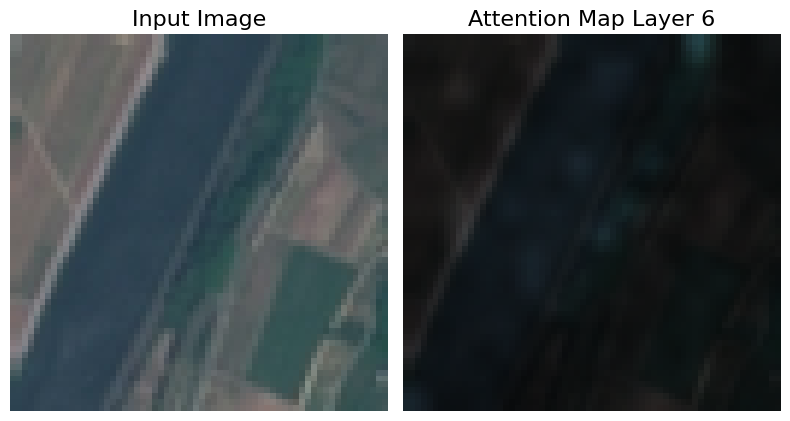

In [35]:
for i, v in enumerate(joint_attentions):
    mask = v[0, 1:].reshape(grid_size, grid_size)
    mask = cv2.resize(mask / mask.max(), im.size)[..., np.newaxis]
    attn_rollout_result = (mask * im).astype("uint8")
    attn_rollout_result.shape

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 10))

    _ = ax1.imshow(im)
    _ = ax2.imshow(attn_rollout_result)
    ax1.set_title("Input Image", fontsize=16)
    ax2.set_title(f"Attention Map Layer {i+1}", fontsize=16)
    ax1.axis("off")
    ax2.axis("off")

    fig.tight_layout()
    fig.subplots_adjust(top=1.35)
    fig.show()

Method I: Mean attention distance
https://keras.io/examples/vision/probing_vits/

In [36]:
PATCH_SIZE = 8 # 4, 8, 16
NUM_HEADS = 8

In [37]:
def compute_distance_matrix(patch_size, num_patches, length):
    distance_matrix = np.zeros((num_patches, num_patches))
    for i in range(num_patches):
        for j in range(num_patches):
            if i == j:  # zero distance
                continue

            xi, yi = (int(i / length)), (i % length)
            xj, yj = (int(j / length)), (j % length)
            distance_matrix[i, j] = patch_size * np.linalg.norm([xi - xj, yi - yj])

    return distance_matrix


def compute_mean_attention_dist(patch_size, attention_weights, model_type):
    num_cls_tokens = 2 if "distilled" in model_type else 1

    # The attention_weights shape = (batch, num_heads, num_patches, num_patches)
    attention_weights = attention_weights[
                        ..., num_cls_tokens:, num_cls_tokens:
                        ]  # Removing the CLS token
    num_patches = attention_weights.shape[-1]
    length = int(np.sqrt(num_patches))
    assert length ** 2 == num_patches, "Num patches is not perfect square"

    distance_matrix = compute_distance_matrix(patch_size, num_patches, length)
    h, w = distance_matrix.shape

    distance_matrix = distance_matrix.reshape((1, 1, h, w))
    distance_matrix = torch.Tensor(distance_matrix)
    # The attention_weights along the last axis adds to 1
    # this is due to the fact that they are softmax of the raw logits
    # summation of the (attention_weights * distance_matrix)
    # should result in an average distance per token.
    mean_distances = torch.matmul(attention_weights, distance_matrix)
    mean_distances = np.sum(
        mean_distances.detach().numpy(), axis=-1
    )  # Sum along last axis to get average distance per token
    mean_distances = np.mean(
        mean_distances, axis=-1
    )  # Now average across all the tokens

    return mean_distances

In [38]:
len(attention_score_dict)

6

In [39]:
attention_score_dict[0].shape

torch.Size([1, 8, 257, 257])

In [40]:
# Build the mean distances for every Transformer block.
mean_distances = {
    f"transformer_block_{i}_att_mean_dist": compute_mean_attention_dist(
        patch_size=PATCH_SIZE,
        attention_weights=attention_weight,
        model_type="original_vit",
    )
    for i, attention_weight in enumerate(attention_score_dict)
}
mean_distances["transformer_block_0_att_mean_dist"].shape

(1, 8)

In [41]:
mean_distances["transformer_block_0_att_mean_dist"].shape[1]

8

In [42]:
# Get the number of heads from the mean distance output.
num_heads = mean_distances["transformer_block_0_att_mean_dist"].shape[1]
# num_heads = NUM_HEADS

# Print the shapes
print(f"Num Heads: {num_heads}.")

Num Heads: 8.


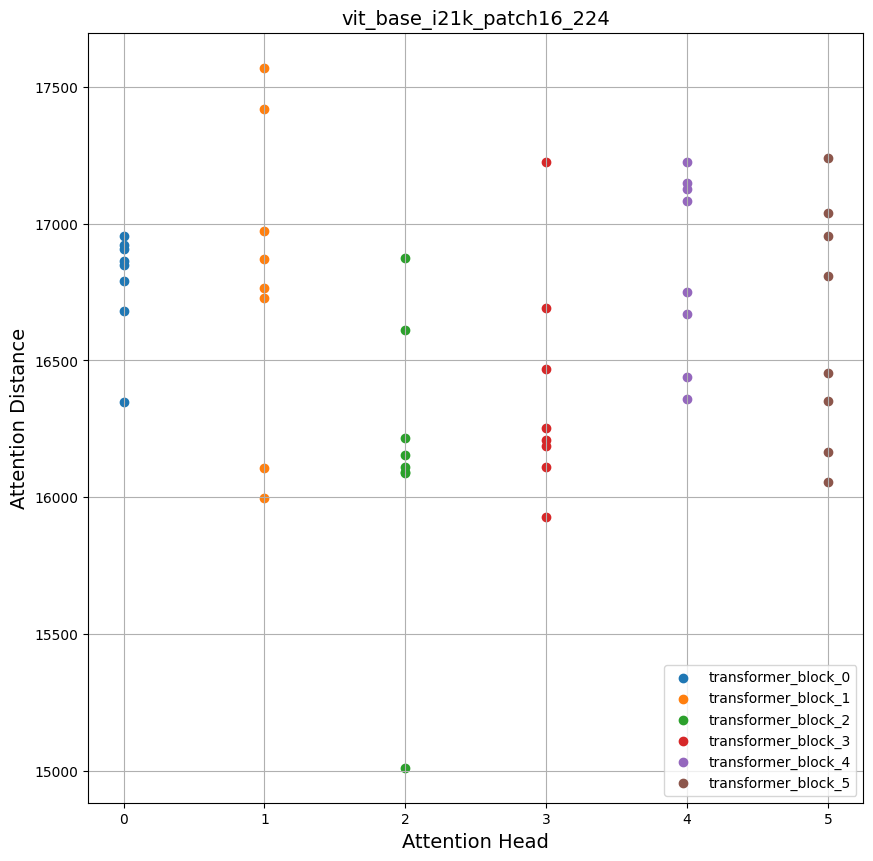

In [43]:
plt.figure(figsize=(10, 10))

for idx in range(len(mean_distances)):
    mean_distance = mean_distances[f"transformer_block_{idx}_att_mean_dist"]
    x = [idx] * num_heads
    y = mean_distance[0, :]
    plt.scatter(x=x, y=y, label=f"transformer_block_{idx}")

plt.legend(loc="lower right")
plt.xlabel("Attention Head", fontsize=14)
plt.ylabel("Attention Distance", fontsize=14)
plt.title("vit_base_i21k_patch16_224", fontsize=14)
plt.grid()
plt.show()